In [1]:
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plot
import numpy as np
from skimage import color
from skimage import io
from random import shuffle

In [2]:
current_dir = os.getcwd()
print(current_dir)

E:\SegNet


In [4]:
files = os.listdir("E:/UNet/Carvana/train/")
shuffle(files)
print(files)
print(len(files))

['c353e364e931_09.jpg', '8b88fb784951_05.jpg', '69915dab0755_11.jpg', '66fea07e1152_11.jpg', '0495dcf27283_16.jpg', '82f72273d23e_14.jpg', '4fc2470c0f7b_09.jpg', '85cba1a00135_16.jpg', '78bfb9c780db_06.jpg', 'c9f382c7349e_03.jpg', '5fb012d30fd9_11.jpg', '90b65c521a8b_09.jpg', 'c353e364e931_05.jpg', '795d2ee07ce2_07.jpg', 'be86e79f1225_15.jpg', 'cf89c3220bc4_10.jpg', '4e5ac4b9f074_12.jpg', '245f9c9eab8a_12.jpg', 'e1d2c25f3510_12.jpg', '1aba91a601c6_07.jpg', '66fea07e1152_15.jpg', 'e8f607100c1f_11.jpg', '1258cf954183_13.jpg', '7fbc761387f3_08.jpg', 'd46244bc42ed_08.jpg', 'c4f1840b2a65_16.jpg', 'c3dafdb02e7f_12.jpg', 'a7c1ef8d9cc9_08.jpg', '1390696b70b6_15.jpg', '16f0ec26d608_07.jpg', '2faf504842df_02.jpg', '9d8c465a0881_01.jpg', 'ef5567efd904_11.jpg', '16f0ec26d608_06.jpg', '293a0fa72e5b_12.jpg', '88bc32b9e1d9_08.jpg', 'c53e374fdd72_10.jpg', '6f6dced498c4_15.jpg', 'e597d76a0c33_11.jpg', 'ae296a20fdd9_14.jpg', 'bd8d5780ed04_07.jpg', 'dc1c5c2b9e49_14.jpg', 'e597d76a0c33_04.jpg', 'd3d0d2662

In [7]:
mean = np.zeros((256,256, 3))
print(mean.shape)
for i in files:
    temp = np.array(Image.open(f"E:/UNet/Carvana/train/{i}").resize((256,256)))
    mean = mean + temp
mean = mean/len(files)
print(mean)

(256, 256, 3)
[[[244.26650943 243.96698113 243.82095126]
  [244.10220126 243.80267296 243.65664308]
  [243.96698113 243.68533805 243.49705189]
  ...
  [240.64897799 239.36340409 239.00373428]
  [240.73093553 239.42177673 239.13659591]
  [240.66863208 239.3577044  239.07134434]]

 [[244.26650943 243.96698113 243.82095126]
  [244.10220126 243.80267296 243.65664308]
  [243.96698113 243.68533805 243.49705189]
  ...
  [240.66725629 239.38168239 239.02201258]
  [240.74980346 239.44064465 239.15546384]
  [240.6875     239.37657233 239.09021226]]

 [[244.17433176 243.87421384 243.72818396]
  [244.0495283  243.75       243.60397013]
  [243.92295597 243.64131289 243.45302673]
  ...
  [240.59984277 239.31387579 238.95518868]
  [240.71285377 239.40349843 239.11910377]
  [240.64033019 239.32999214 239.04363208]]

 ...

 [[195.38423742 194.3879717  194.41214623]
  [195.62617925 194.68376572 194.70499214]
  [196.21324686 195.33117138 195.09080189]
  ...
  [197.51238208 196.95165094 195.7509827 ]
  [1

In [9]:
np.save("./d/Carvana/mean_of_traindata", mean)

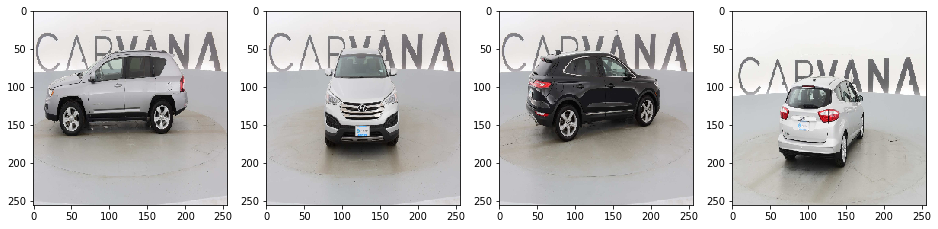

done


In [10]:
for bn in range(len(files)//8):
    images = []
    for i in range(bn*8, (bn+1)*8):
        img_temp = Image.open(f"E:/UNet/Carvana/train/{files[i]}")
        images.append(np.array(img_temp.resize((256,256))))
        np.save(f"{current_dir}/d/Carvana/train_x/x_orig{bn}", images)


fig = plot.figure(figsize = (16, 16))
for i in range(1, 5):
    fig.add_subplot(1, 4, i)
    plot.imshow(images[i-1])
plot.show()
print("done")

In [11]:
mfiles = []
for name in files:
    mfiles.append(name[:15] + '_mask.gif')
print(mfiles)

['c353e364e931_09_mask.gif', '8b88fb784951_05_mask.gif', '69915dab0755_11_mask.gif', '66fea07e1152_11_mask.gif', '0495dcf27283_16_mask.gif', '82f72273d23e_14_mask.gif', '4fc2470c0f7b_09_mask.gif', '85cba1a00135_16_mask.gif', '78bfb9c780db_06_mask.gif', 'c9f382c7349e_03_mask.gif', '5fb012d30fd9_11_mask.gif', '90b65c521a8b_09_mask.gif', 'c353e364e931_05_mask.gif', '795d2ee07ce2_07_mask.gif', 'be86e79f1225_15_mask.gif', 'cf89c3220bc4_10_mask.gif', '4e5ac4b9f074_12_mask.gif', '245f9c9eab8a_12_mask.gif', 'e1d2c25f3510_12_mask.gif', '1aba91a601c6_07_mask.gif', '66fea07e1152_15_mask.gif', 'e8f607100c1f_11_mask.gif', '1258cf954183_13_mask.gif', '7fbc761387f3_08_mask.gif', 'd46244bc42ed_08_mask.gif', 'c4f1840b2a65_16_mask.gif', 'c3dafdb02e7f_12_mask.gif', 'a7c1ef8d9cc9_08_mask.gif', '1390696b70b6_15_mask.gif', '16f0ec26d608_07_mask.gif', '2faf504842df_02_mask.gif', '9d8c465a0881_01_mask.gif', 'ef5567efd904_11_mask.gif', '16f0ec26d608_06_mask.gif', '293a0fa72e5b_12_mask.gif', '88bc32b9e1d9_08_ma

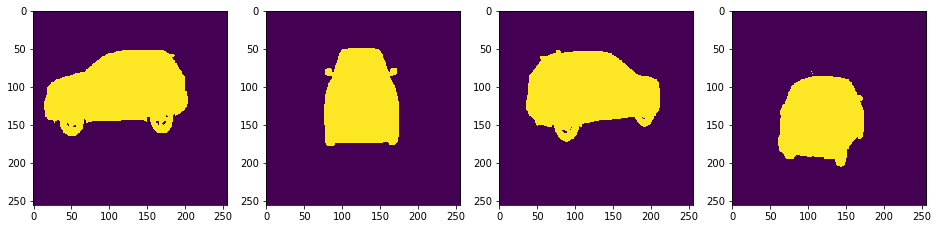

done


In [12]:
for bn in range(len(mfiles)//8):
    image_masks = []
    for i in range(bn*8, (bn+1)*8):
        img_temp = Image.open(f"E:/UNet/Carvana/train_masks/{mfiles[i]}")
        image_masks.append(np.array(img_temp.resize((256,256))))
        np.save(f"{current_dir}/d/Carvana/train_y_sparse/y_labels{bn}", image_masks)
        

fig1 = plot.figure(figsize = (16, 16))
for i in range(1, 5):
    fig1.add_subplot(1, 4, i)
    plot.imshow(image_masks[i-1])
plot.show()
print("done")

In [13]:
print(image_masks[3][:, 80])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
imgs = np.load("./d/Carvana/train_x/x_orig0.npy")
img_masks = np.load("./d/Carvana/train_y_sparse/y_labels0.npy")
print(imgs.shape)
if len(imgs.shape)==3:
    imgs = np.expand_dims(imgs, axis=3)
print(imgs.shape)
print(img_masks.shape)
imgs = imgs/255

(8, 256, 256, 3)
(8, 256, 256, 3)
(8, 256, 256)


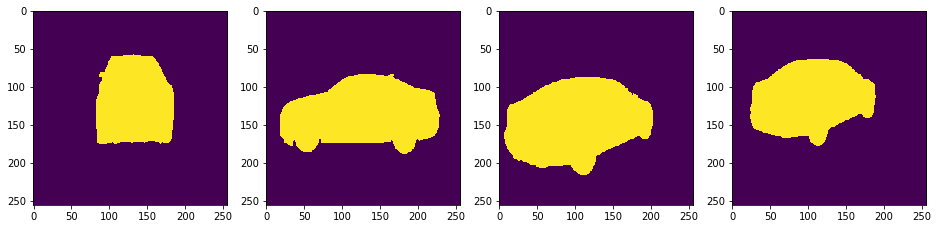

In [15]:
fig1 = plot.figure(figsize = (16, 16))
for i in range(1, 5):
    fig1.add_subplot(1, 4, i)
    plot.imshow(img_masks[i-1])
plot.show()

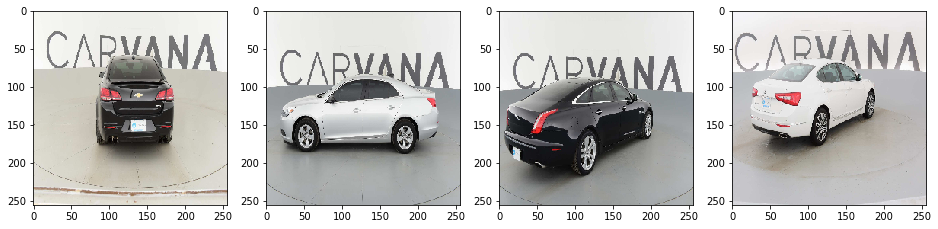

In [16]:
fig = plot.figure(figsize = (16, 16))
for i in range(1, 5):
    fig.add_subplot(1, 4, i)
    plot.imshow(imgs[i-1])
plot.show()

In [17]:
def zero_mean_batch(batch):
    meaned_batch = batch
    mean = np.mean(batch, axis=0)
    for i in range(len(batch)):
        meaned_batch[i] = batch[i] - mean
    return meaned_batch

print(imgs.shape)
imgs = zero_mean_batch(imgs)
print(imgs.shape)

(8, 256, 256, 3)
(8, 256, 256, 3)
